In [119]:
import pandas as pd
import numpy as np
import requests
import re

import matplotlib.pyplot as plt
% matplotlib inline

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

This workbook explores the tweet data from @WeRateDogs twitter profile. This user rates dogs when other users tweet images of their dogs at them. We will be looking at three different data sources for this, including pulling the tweets via Twitter API code.

# Step 1: Wrangle

1. Read in the enhanced twitter archive to df_archive dataframe.

In [120]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

2. Programmatically pull the image predictions file using the Pythons requests library into pred_df dataframe.

In [121]:
predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predictions_url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
df_im_pred = pd.read_csv('image-predictions.tsv', sep='\t' )

3. Pull the retweet and favorite counts into JSON txt file using the Twitter API and Tweet IDs and read into df_rt_fav dataframe.

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [122]:
df_tweet_json = pd.read_json('tweet_json.txt',lines=True)

# Step 2: Assess

Let's start by taking a look at each of the datasets visually and programmatically.

In [123]:
df_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [124]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The structure here looks mostly fine, but the dog types being in multiple columns stands out as a tidiness issue which could be addressed. Additionally, we have some null values in the __in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and__ __expanded_urls__ columns.

In [125]:
df_im_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [126]:
df_im_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The image_predictions.tsv file looks sounds both structurally and from a data quality perspective.

In [127]:
df_tweet_json.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36393,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7744,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31341,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5733,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23615,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3794,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",39690,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7907,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",37892,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8530,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [128]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

This data looks a bit messy. Some of the columns appear to have JSON content in them, and there are many null values across multiple columns. However, we will only be using the favorites and retweets columns. Let's look at the dataframe from that perspective. 

Extract the columns we wish to use: id (for merging the tables), favorite_count, retweet_count.

In [129]:
df_rt_fav = df_tweet_json[['id','favorite_count','retweet_count']].copy()
df_rt_fav.rename(columns = {'id':'tweet_id'}, inplace = True)

In [130]:
df_rt_fav.head(5)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36393,7744
1,892177421306343426,31341,5733
2,891815181378084864,23615,3794
3,891689557279858688,39690,7907
4,891327558926688256,37892,8530


In [131]:
df_rt_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


Great - these are of int64 type with no null values. We shouldn't need to make any additional changes here. Let's now go through some of the issues we see here and take a closer look for more issues we can address in the cleaning phase.

### Tidiness Issue #1: Dog ratings

The dog ratings are stored in multiple columns, numerator and denominator. These should be combined to represent the rating with one column.

### Tidiness Issue #2: Duplicated data across multiple dataframes

We currently have 3 different data sources with some duplicated data between them. We should merge them into one dataframe for tidiness.

### Quality Issue #1: Remove Tweets without an image

As per the project requirements, we should not have any tweets without an image. We should be able to take care of this when we merge the dataframes.

### Quality Issue #2: Remove Retweets

As per the project requirements, we only want to deal with original tweets, not retweets.

### Quality Issue #3: Missing/incorrect name

From the archive table, we can see some names are incorrect, either because the are incorrect, either because they aren't included in the tweet or were not captured correctly when read into the file.

### Quality Issue #4:  Remove unneeded columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

Since we are not dealing with retweets, we can drop these columns.

### Quality Issue #5: Incorrectly extracted numerator values

This is occuring when there is a decimal value in the numerator. We need to correct these ratings values. For example, we have a tweet 786709082849828864 which should be 9.75, but is instead 75.

### Quality Issue #6: Timestamp not correct datatype

Timestamp should be datetime type, not string.

In [132]:
df_arch.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Quality Issue #7: Missing data for ratings

Some of the tweets in the tweet JSON dataset do not have ratings in the archive sheet. We should drop these so they do not skew any analyses. When we merge with the archive dataset this should be taken care of.

### Quality Issue #8: Incorrect data in "favorited" column

In the JSON tweet data, Tweets that are favorited are incorrectly marked as "FALSE" in the favorited column. These should be set to "TRUE".

In [133]:
df_tweet_json.favorited.value_counts()

False    2331
Name: favorited, dtype: int64

# Step 3: Clean

Let's begin the cleaning process! I am going to do this sheet by sheet, then logically combine the cleaned individual sheets into one main sheet to address the remaining issues.

### JSON Tweet Data
Let's start with the JSON tweet data sheet as there is only one issue to address here. We'll begin by taking a copy in case we run into issues.

In [134]:
df_json = df_tweet_json.copy()

### Quality Issue #8: Incorrect data in "favorited" column

#### Define

In the JSON tweet data, Tweets that are favorited are incorrectly marked as "FALSE" in the favorited column. These should be set to "TRUE".

#### Code

In [135]:
df_json.favorited = df_json.favorite_count.apply(lambda x: 'TRUE' if x > 0 else 'FALSE')

#### Test

In [136]:
df_json.favorited.value_counts()

TRUE     2168
FALSE     163
Name: favorited, dtype: int64

### Twitter Archive Enhanced
Here is where most of our cleaning will take place. Let's take a copy here too.

In [137]:
df_archive = df_arch.copy()

### Quality Issue #5: Incorrectly extracted numerator values

#### Define

This is occuring when there is a decimal value in the numerator. We need to correct these ratings values.

#### Code

In [138]:
new_ratings = df_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [139]:
df_archive.rating_numerator = new_ratings.astype(float)

#### Test

In [140]:
df_archive.loc[df_archive['tweet_id']==786709082849828864, ['rating_numerator']]

,rating_numerator
695,9.75


### Tidiness Issue #1: Dog ratings

#### Define

The dog ratings are stored in multiple columns, numerator and denominator. These should be combined to represent the rating with one column.

#### Code

In [141]:
df_archive['rating'] = df_archive['rating_numerator']/df_archive['rating_denominator']*100

#### Test

In [142]:
df_archive['rating']

0       130.0
1       130.0
2       120.0
3       130.0
4       120.0
5       130.0
6       130.0
7       130.0
8       130.0
9       140.0
10      130.0
11      130.0
12      130.0
13      120.0
14      130.0
15      130.0
16      120.0
17      130.0
18      130.0
19      130.0
20      120.0
21      130.0
22      140.0
23      130.0
24      130.0
25      120.0
26      130.0
27      130.0
28      130.0
29      120.0
        ...  
2326     20.0
2327     70.0
2328     90.0
2329    110.0
2330     60.0
2331     80.0
2332    100.0
2333     90.0
2334     30.0
2335     50.0
2336    110.0
2337    100.0
2338     10.0
2339    110.0
2340     80.0
2341     90.0
2342     60.0
2343    100.0
2344     90.0
2345    100.0
2346     80.0
2347     90.0
2348    100.0
2349     20.0
2350    100.0
2351     50.0
2352     60.0
2353     90.0
2354     70.0
2355     80.0
Name: rating, Length: 2356, dtype: float64

### Quality Issue #2: Remove Retweets

#### Define

As per the project requirements, we only want to deal with original tweets, not retweets.

#### Code

In [143]:
df_archive = df_archive[df_archive['retweeted_status_id'].isnull()]

#### Test

In [144]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
rating                        2175 n

### Quality Issue #3: Missing/incorrect name

#### Define

From the archive table, we can see some names are incorrect, either because the are incorrect, either because they aren't included in the tweet or were not captured correctly when read into the file. Let's add a few regex expressions to try and capture some that were missed, and replace the others with "None". We can create a mask (thanks Udacity forums!) to help single out these values, commonly represented in lower-case.

#### Code

In [145]:
mask = df_archive.name.str.islower()

In [146]:
df_archive.loc[mask, 'name'].value_counts()

a               55
the              8
an               6
one              4
very             4
just             3
quite            3
actually         2
getting          2
not              2
light            1
such             1
space            1
this             1
my               1
infuriating      1
unacceptable     1
incredibly       1
officially       1
his              1
all              1
by               1
mad              1
life             1
old              1
Name: name, dtype: int64

Next, let's create a function to replace some common missed expressions.

In [147]:
def getName(sentences):
    new_names = []
    for sentence in sentences:
        if re.search(r"name is (\w+)", sentence) is not None:
            new_name = re.search(r"name is (\w+)", sentence).group(1)
        elif re.search(r"named (\w+)", sentence) is not None:
            new_name = re.search(r"named (\w+)", sentence).group(1)
        else: new_name = 'None'
        new_names.append(new_name)
    return new_names

In [148]:
df_archive.loc[mask, 'name'] = getName(df_archive.loc[mask, 'text'])

#### Test

In [149]:
df_archive.loc[mask, 'name'].value_counts()

None         82
Kip           1
Wylie         1
Cherokee      1
Spork         1
Chuk          1
Rufus         1
Alphred       1
Alfonso       1
Alfredo       1
Berta         1
Octaviath     1
Daryl         1
Cheryl        1
Leroi         1
Kohl          1
Johm          1
Jessiga       1
Pepe          1
Hemry         1
Zoey          1
Klint         1
Jacob         1
Name: name, dtype: int64

### Quality Issue #4:  Remove unneeded columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Define

Since we are not dealing with retweets, we can drop these columns.

#### Code

In [150]:
df_archive = df_archive.drop(labels=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [151]:
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,130.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,130.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,120.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,130.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,120.0


### Quality Issue #6: Timestamp not correct datatype

#### Define

Timestamp should be datetime type, not string.

#### Code

In [152]:
df_archive.timestamp = pd.to_datetime(df_archive.timestamp)

#### Test

In [153]:
df_archive.dtypes

tweet_id                          int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                float64
rating_denominator                int64
name                             object
doggo                            object
floofer                          object
pupper                           object
puppo                            object
rating                          float64
dtype: object

### Merging Data Sets: Tidiness Issue #2, Quality Issue #1, Quality Issue #7

#### Define

1) As per the project requirements, we should not have any tweets without an image. 2) Some of the tweets in the tweet JSON dataset do not have ratings in the archive sheet. We should drop these so they do not skew any analyses.  3) We currently have 3 different data sources with some duplicated data between them. 

When we merge with the datasets, this should be taken care of.

#### Code

In [154]:
df_merged = df_pred.merge(df_archive)
df_master = df_merged.merge(df_rt_fav)

#### Test

1) Verify there are images associated with each tweet.

In [155]:
df_master.jpg_url.isnull().sum()

0

2) Verify there are ratings associated with each tweet.

In [156]:
df_master.rating.isnull().sum()

0

3) Verify there are no duplicate entries.

In [157]:
df_master.duplicated().sum()

0

# Step 4: Store

Now that we have the data together in a master dataframe, let's store this as a .csv file before proceeding with Analysis and Visualization.

In [158]:
df_master.to_csv('twitter_archive_master.csv')

# Step 5: Analysis and Visualization

I am particularly interested in dog names, and their success with the rating system as well as retweets and favorites. With our master data, let's start exploring some questions to dive into this:
1. What are the most common dog names?
2. Which common dog names yield the highest ratings?
3. Which dog names yield the highest favorite/retweet count?

### What are the most common dog names?

Let's start by taking a look at the value counts.

In [159]:
df_master.name.value_counts()

None         622
Oliver        10
Charlie       10
Cooper        10
Penny          9
Tucker         9
Lucy           9
Winston        8
Sadie          8
Lola           7
Daisy          7
Toby           7
Koda           6
Bella          6
Jax            6
Bo             6
Stanley        6
Milo           5
Chester        5
Leo            5
Scout          5
Dave           5
Buddy          5
Rusty          5
Louis          5
Oscar          5
Bailey         5
Maggie         4
Clarence       4
Winnie         4
            ... 
Layla          1
Kara           1
Beemo          1
Olaf           1
Quinn          1
Danny          1
Rupert         1
Sundance       1
Leonard        1
Bertson        1
Glacier        1
Rumble         1
Alejandro      1
Blakely        1
Fizz           1
Goliath        1
Amélie         1
Kody           1
Grey           1
Zuzu           1
Liam           1
Dudley         1
Chevy          1
Antony         1
Stubert        1
Alexander      1
Rover          1
Gordon        

The top dog names with 10 occurences each are Charlie, Oliver, and Cooper - this makes sense to me, because I know dog friends with each of those names! Let's ignore the "None" and "Other" values to see this distribution visually.

In [160]:
names_to_drop = df_master[df_master['name'] == 'None'].index
df_names = df_master.drop(index=names_to_drop)
print(len(df_names.name.unique()))

929


There are a total of 929 unique dog names.

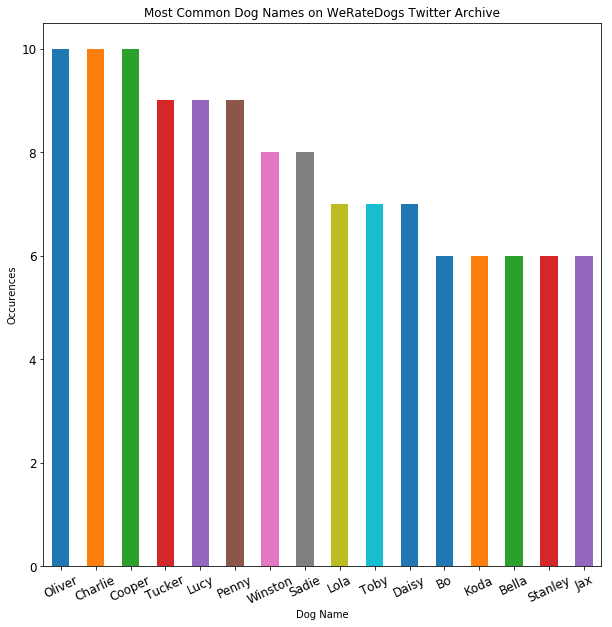

In [161]:
count = df_names.name.value_counts()
threshold = 5
mask = count > threshold
count = count.loc[mask]
count.plot(kind='bar', figsize=(10,10),fontsize=12, title='Most Common Dog Names on WeRateDogs Twitter Archive')
plt.xticks(rotation=25)
plt.xlabel('Dog Name')
plt.ylabel('Occurences')
plt.show()

Cool - so the most common dog names (with 6 or more occurences) are, in order and with ties, Cooper, Charlie, Oliver, Tucker, Penny, Lucy, Winston, Sadie, Lola, Daisy, Toby, Koda, Bo, Stanley, Jax, Bella. I bet all of us know at least one but likely more dogs with these names! Now, let's explore dog names with the highest average ratings. Let's do this by first creating a new dataframe with just the name and rating, and then using groupby and a plot. Let's continue to use the most common dog names for this analysis to avoid dogs with few ratings by saving the indices as a mask.

In [162]:
name_mask = count.index

Now let's create our new dataframe.

In [163]:
df_names_ratings = df_names[['name','rating']].copy()

In [164]:
ratings_data = df_names_ratings.groupby('name').mean().rating
ratings_data = ratings_data.loc[name_mask]
ratings_data.describe()

count     16.000000
mean     111.900794
std        5.720378
min      102.500000
25%      106.666667
50%      112.611111
75%      116.166667
max      121.666667
Name: rating, dtype: float64

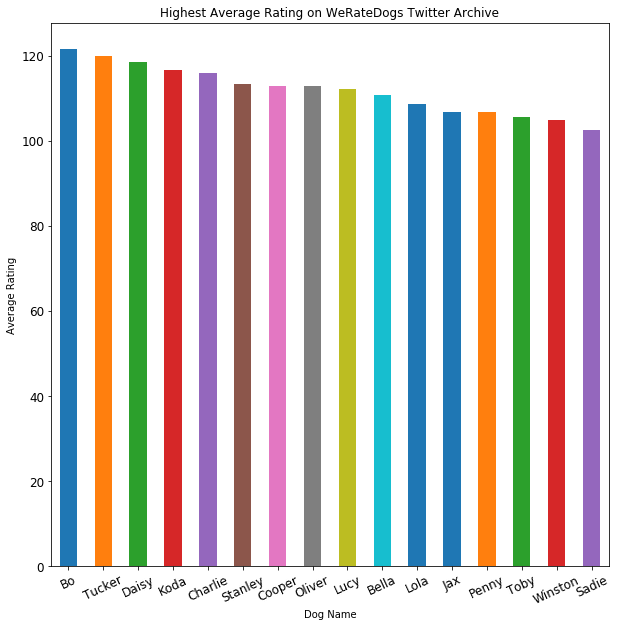

In [165]:
#threshold = 130
ratings_data.sort_values(ascending=False).plot(kind='bar', figsize=(10,10),fontsize=12, title='Highest Average Rating on WeRateDogs Twitter Archive')
plt.xticks(rotation=25)
plt.xlabel('Dog Name')
plt.ylabel('Average Rating')
plt.show()

Interesting. While Bo was on the lower end of the occurence plot, he comes in first place in the average rating. Nice job, Bo! Our three top dogs Charlie, Cooper, and Oliver landed near the middle on rating.All of these dogs had an average rating over 100. This could possibly suggest that the more times a name occurs, the higher rating that can be expected - but we can't quite draw that conclusion.

Next up: favorites and retweets!

I want to explore which names receive the most total favorites and retweets and see if we can pick out any trends. For this analysis, I would like to combine favorites and retweet counts into one 'Total' column.

In [166]:
df_master['total_rt_fav'] = df_master['favorite_count'] + df_master['retweet_count']

In [167]:
df_names_rt_fav = df_master.drop(index=names_to_drop)

In [168]:
df_names_rt_fav = df_names_rt_fav[['name','total_rt_fav']]

In [169]:
df_names_rt_fav_sum = df_names_rt_fav.groupby('name').sum().total_rt_fav

In [170]:
df_names_rt_fav_sum.describe()

count       929.000000
mean      16094.404736
std       23166.066739
min         222.000000
25%        2954.000000
50%        7564.000000
75%       20011.000000
max      237048.000000
Name: total_rt_fav, dtype: float64

Now let's plot these.

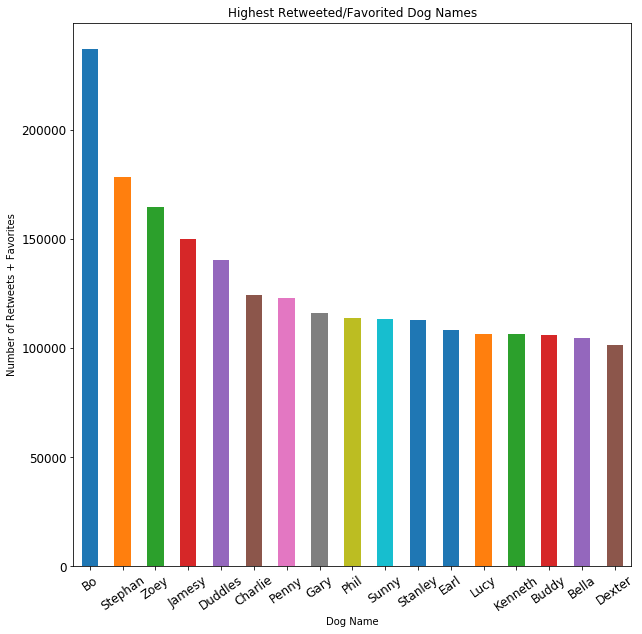

In [171]:
threshold = 100000
mask = df_names_rt_fav_sum > threshold
df_names_rt_fav_sum = df_names_rt_fav_sum.loc[mask]
df_names_rt_fav_sum.sort_values(ascending=False).plot(kind='bar', figsize=(10,10),fontsize=12, title='Highest Retweeted/Favorited Dog Names')
plt.xticks(rotation=35)
plt.xlabel('Dog Name')
plt.ylabel('Number of Retweets + Favorites')
plt.show()

We see Bo again taking the trophy, this time for retweet and favorite count. We again see a handful of the common dog names make an appearance here as well.

Please see _act__report.pdf_ for a more detailed look at the analysis.

In [172]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0